In [35]:
# import packages
import os
import re
import numpy as np
from numpy.fft import fft, fftshift
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%run utils/helper_functions
%run utils/nmr_objects
%run utils/config

# from utils.helper_functions import *
# from utils.nmr_objects import NMRObject

In [36]:
# main_path = '/Users/mehipour/Downloads/Bruker 3/Perfusion/'
main_path = '/home/mehrdad/Documents/fmig/data/Perfusion/'
parent_dir = os.listdir(main_path)
parent_dir.remove('.DS_Store')
for dir in parent_dir:
    path = main_path + dir
    print(os.listdir(path))

['.DS_Store', '20200817_192052_31P_control_rat36_1_1']
['20191029_170425_20191029_perfusion_13P_ice_rat24_1_1', '.DS_Store']
['20200814_171319_31P_control_rat35_1_1']
['.DS_Store', '20191030_145007_20191030_perfusion_31P_ice_rat25_1_1']
['20191015_201544_20191015_perfusion_31P_baseline_rat20_1_1', '20191015_204635_20191015_perfusion_13C_baseline_rat20_1_1']
['20191016_192723_20191016_perfusion_31P_baseline_rat21_1_1', '20191016_195139_20191016_perfusion_13C_baseline_rat21_1_1']
['20191024_201806_20191024_perfusion_31P_ice_rat23_1_1']
['20191004_213401_20191004_perfusion_13C_baseline_rat17_1_1', '20191004_203017_20191004_perfusion_31P_baseline_rat17_1_1']
['20191011_190111_20191011_perfusion_13C_baseline_rat19_1_1', '20191011_180600_20191011_perfusion_31P_baseline_rat19_1_1']
['20200724_150139_31P_control_rat33_1_1', '.DS_Store']
['20191022_200448_20191022_perfusion_13Creal_baseline_rat22_1_1', '20191022_190718_20191022_perfusion_13C_baseline_rat22_1_1']
['20190920_211253_20190920_perfu

In [37]:
file_path = DATA_DIRECTORY + '20200817-Rat36/20200817_192052_31P_control_rat36_1_1/' + '4'
c = read_complex_fid(file_path, drop_points=POINTS_TO_REMOVE)

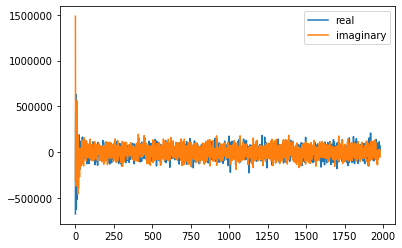

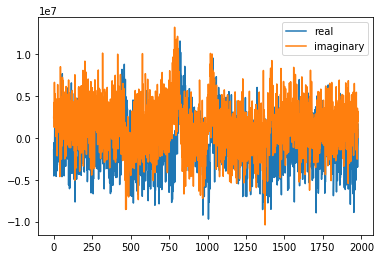

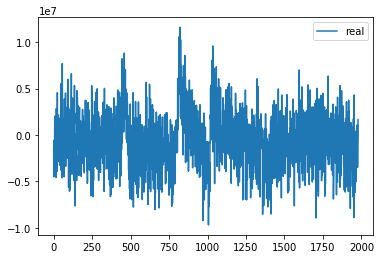

TypeError: 'str' object is not callable

In [38]:
a = NMRObject(c)
a.sw = SW_HZ
a.fid
a.show_fid()
a.show_complex_spectrum()
a.show_real_spectrum()
plt.plot(np.real(a.phased_spectrum))
dir(a)

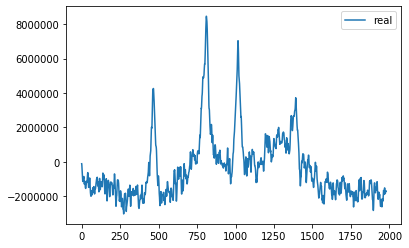

In [52]:
# Let's phase the spectrum
a.line_broad(60)
a.phase(-1.81, -0.0044)
a.show_real_spectrum()
# a.show_abs_spectrum()


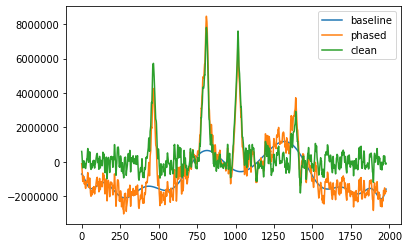

In [53]:
# x = baseline_als(np.real(a.phased_spectrum), 100, 0.9999999, niter=20)
# plt.plot(np.real(x))

peak_idx = list(np.arange(350,550)) + list(np.arange(750,850)) + list(np.arange(950,1100)) + list(np.arange(1250,1500))

a.peak_idx = peak_idx
a.remove_baseline(24)
plt.plot(a.baseline, label='baseline')
plt.plot(a.phased_spectrum, label='phased')
plt.plot(a.clean_spectrum, label='clean')
plt.legend()
plt.show()

# x = np.arange(0,a.np)
# y = np.real(a.phased_spectrum)
# p = np.polyfit(x[idx2], y[idx2], 24)
# z = np.polyval(p, x)
# y, z = correct_baseline(a)
# plt.plot(np.real(a.phased_spectrum))
# plt.plot(z)
# plt.plot(y)

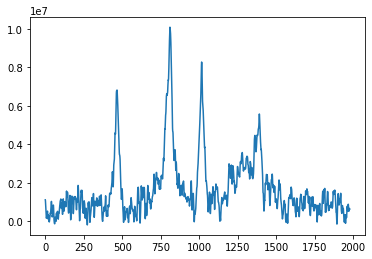

In [57]:
from BaselineRemoval import BaselineRemoval

input_array = np.real(a.phased_spectrum)
polynomial_degree=32 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(input_array)
Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Zhangfit_output=baseObj.ZhangFit()
plt.plot(Zhangfit_output)

In [50]:
# phase spectrum, used for itneractive phasing
def phase_spectrum(ph0, ph1):
    ''' function that's passed on to the interactive object for phasing.

    Args:
        spec_obj::[NMRObject]
            spectrum object
        ph0::[float]
            zero-order phase
        ph1::[float]
            first order phase
    '''
    c = NMRObject(read_complex_fid(file_path))
    a.phase(ph0, ph1/100)
    a.show_real_spectrum()

interactive_plot = interactive(phase_spectrum,
                            ph0=(-pi, pi, pi/360),
                            ph1=(-pi, pi, pi/50))
output = interactive_plot.children[-1]
print(output)
output.layout.height = '350px'
interactive_plot




Output()


interactive(children=(FloatSlider(value=0.0, description='ph0', max=3.141592653589793, min=-3.141592653589793,…

In [172]:
# fid object (done)
    # fid
    # spectrum
    # phase
    # line broadening

# read bruker file (done)

# identify bruker experiments
 
# interactive phasing (done)

# baseline removal (almost done)

# quantification of metabolites

# store parameters in a pandas table, and in a csv file.